In [ ]:
"""  House Price Pridiction model by Param Patel

Pridict House Rate by
bedrooms       - No. of bedrooms
bathrooms      - No. of bathrooms
sqft_living    - square footage of the living
sqft_lot       - square footage of the lot
floors         - No. of floors
waterfront     - Nearby
view           - side views from houes
condition      - Out of 5
no_year        - How old is the house
statezip       - Zipcode

For Final presentation I will be making a flask app where user can input the house info and can get the predected price.
I Will be using Random forest a Supervised Machine Learning Algorithm to test and train my model. Test will be 20% and train will be 80%

"""

In [5]:
import pandas as pd
df=pd.read_csv('house-data.csv')
df.shape

(4600, 11)

In [6]:
#df = df[:750]

In [7]:
df.shape

(4600, 11)

In [8]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
yr_built       0
statezip       0
dtype: int64

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,statezip
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1970.786304,98079.379783
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,29.731848,53.142102
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,98001.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,98033.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1976.000000,98072.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,2014.000000,98354.000000


In [10]:
final_dataset=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','yr_built','statezip']]

In [11]:
final_dataset['Current Year']=2022

In [12]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['yr_built']

In [13]:
final_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,statezip,Current Year,no_year
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1955,98133,2022,67
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,1921,98119,2022,101
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1966,98042,2022,56
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1963,98008,2022,59
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1976,98052,2022,46


In [14]:
final_dataset.drop(['yr_built'],axis=1,inplace=True)

In [15]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [16]:
final_dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,Current Year,no_year
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,98133,2022,67
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,98119,2022,101
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,98042,2022,56
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,98008,2022,59
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,98052,2022,46


In [17]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [18]:
final_dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,no_year
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,-0.046052,-0.021857
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,-0.153443,-0.142461
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,-0.206231,-0.463498
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,-0.210891,-0.287775
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,-0.133509,-0.050706
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,-0.064999,-0.467481
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.005937,0.023563
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.095302,0.064465
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,0.038038,0.399698
statezip,-0.046052,-0.153443,-0.206231,-0.210891,-0.133509,-0.064999,0.005937,0.095302,0.038038,1.000000,0.356920


In [19]:
import seaborn as sns

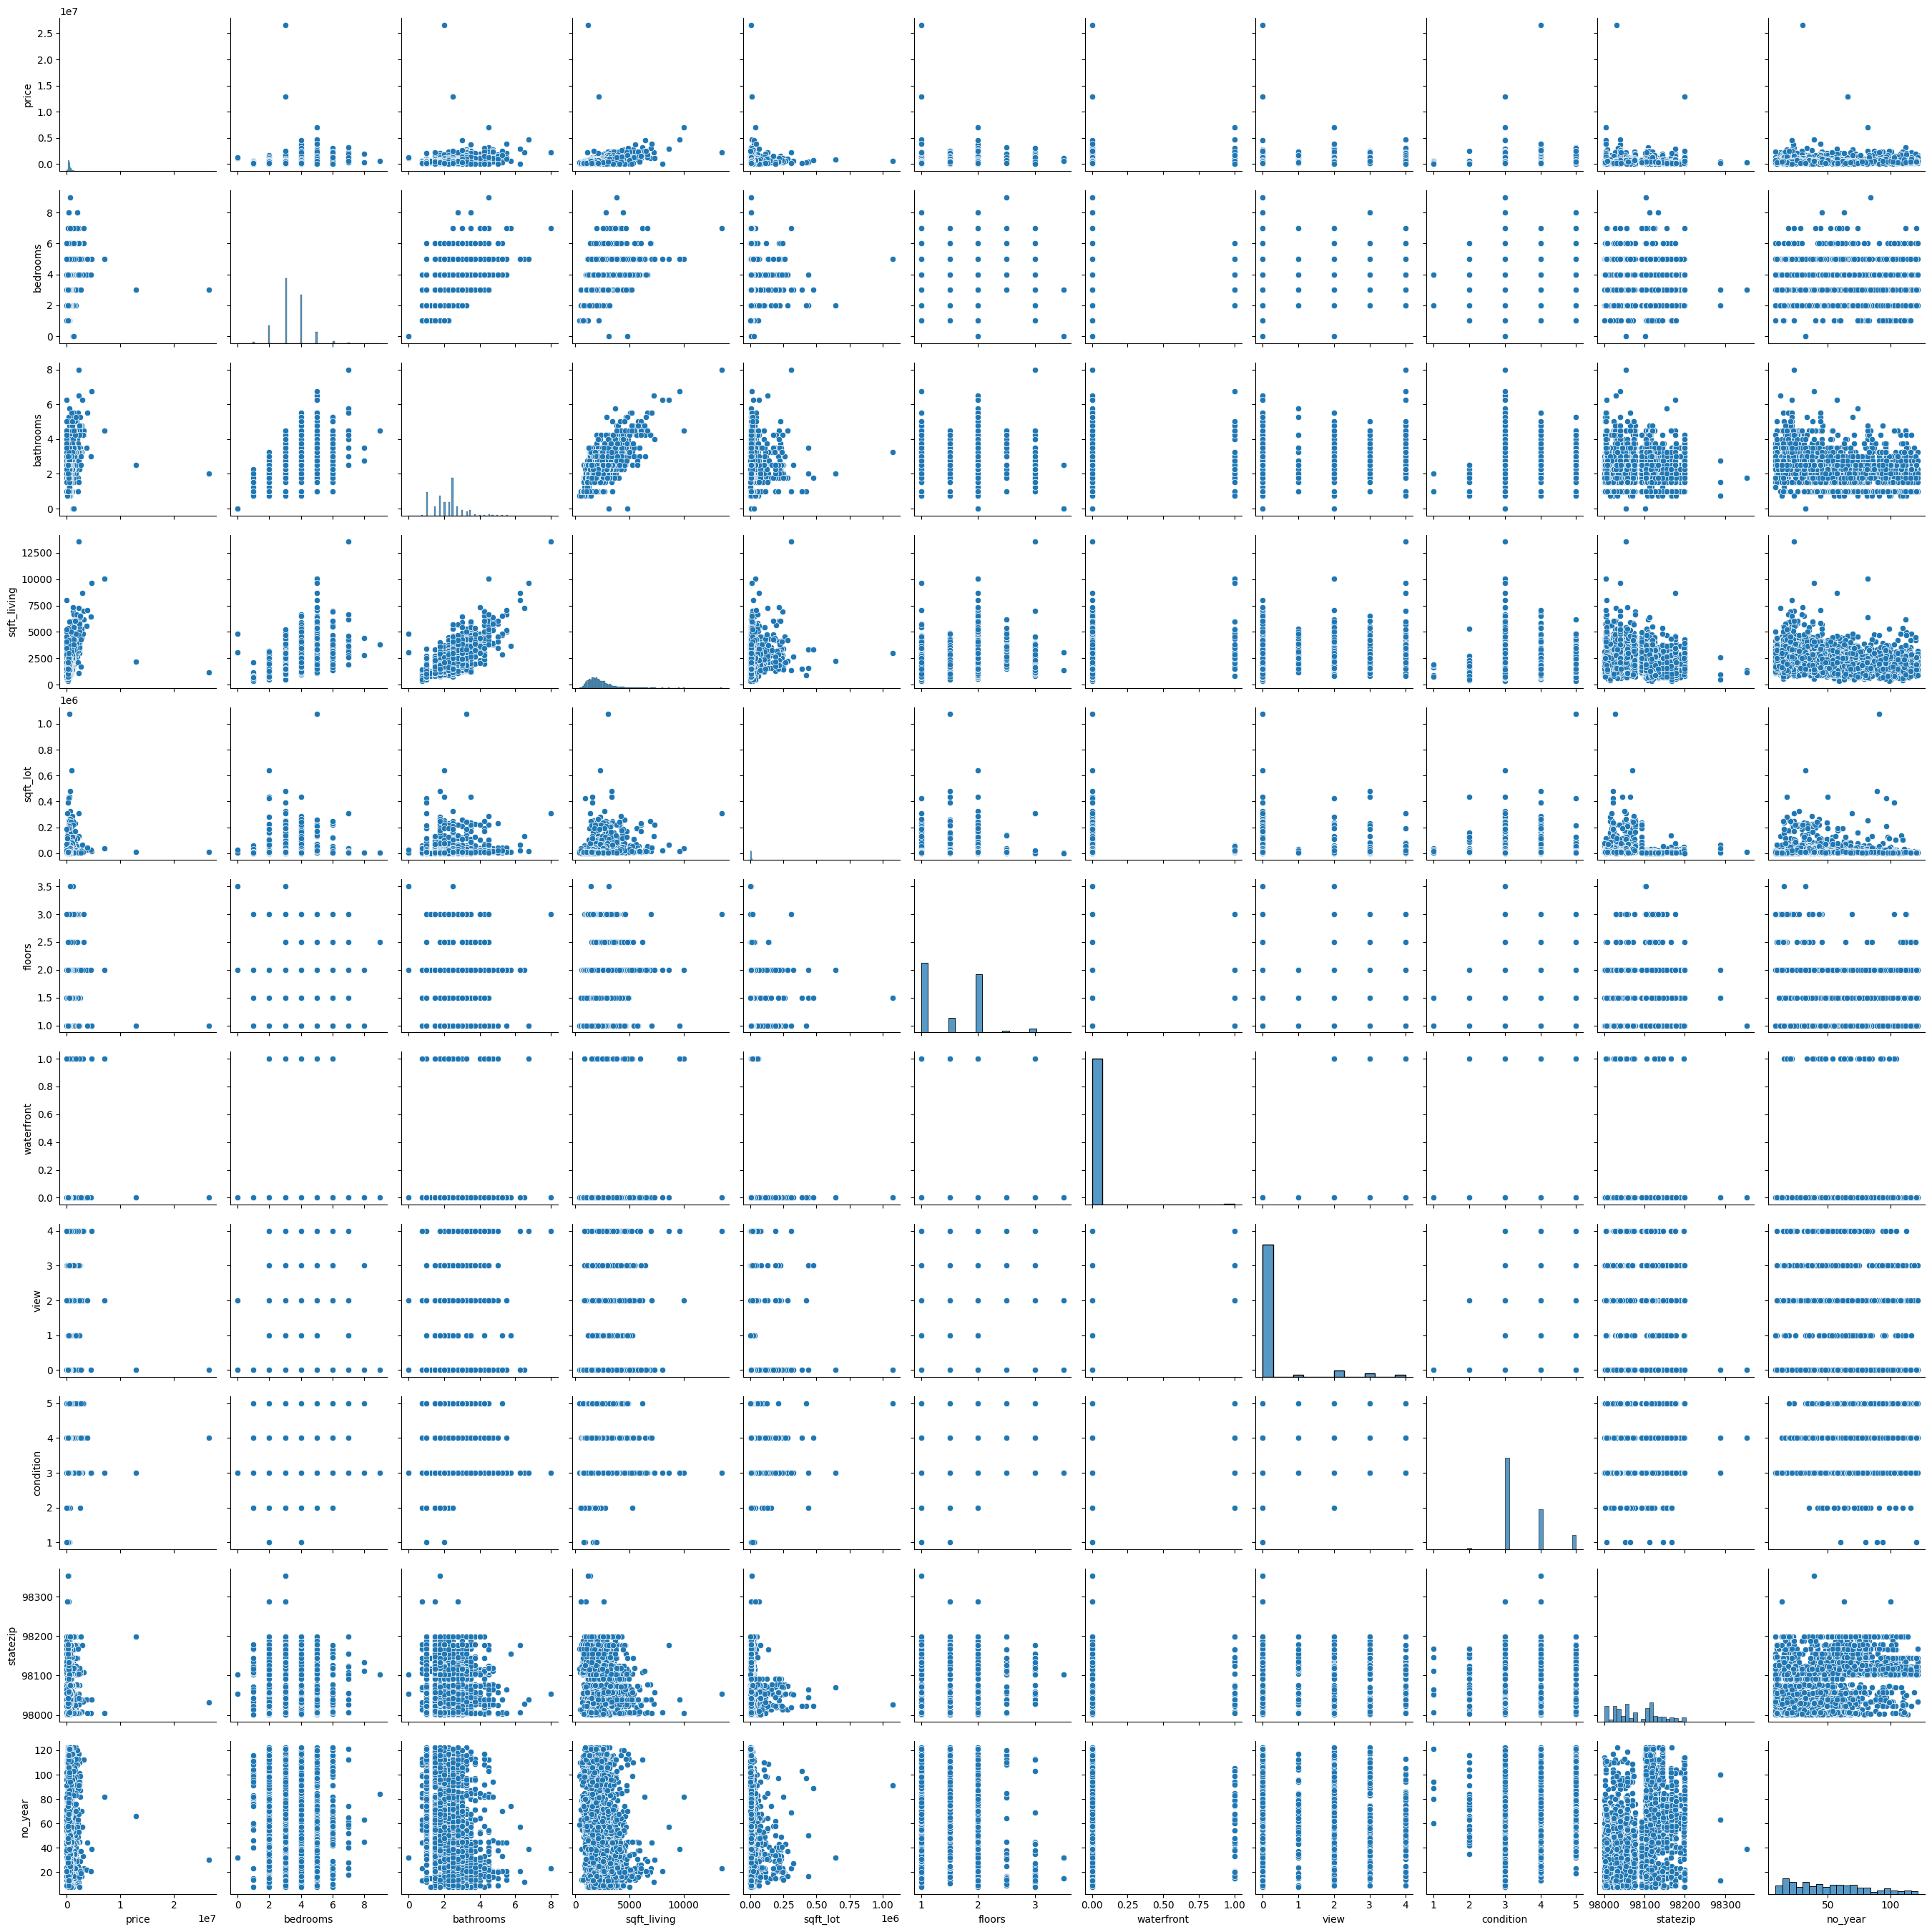

In [20]:
sns.pairplot(final_dataset)

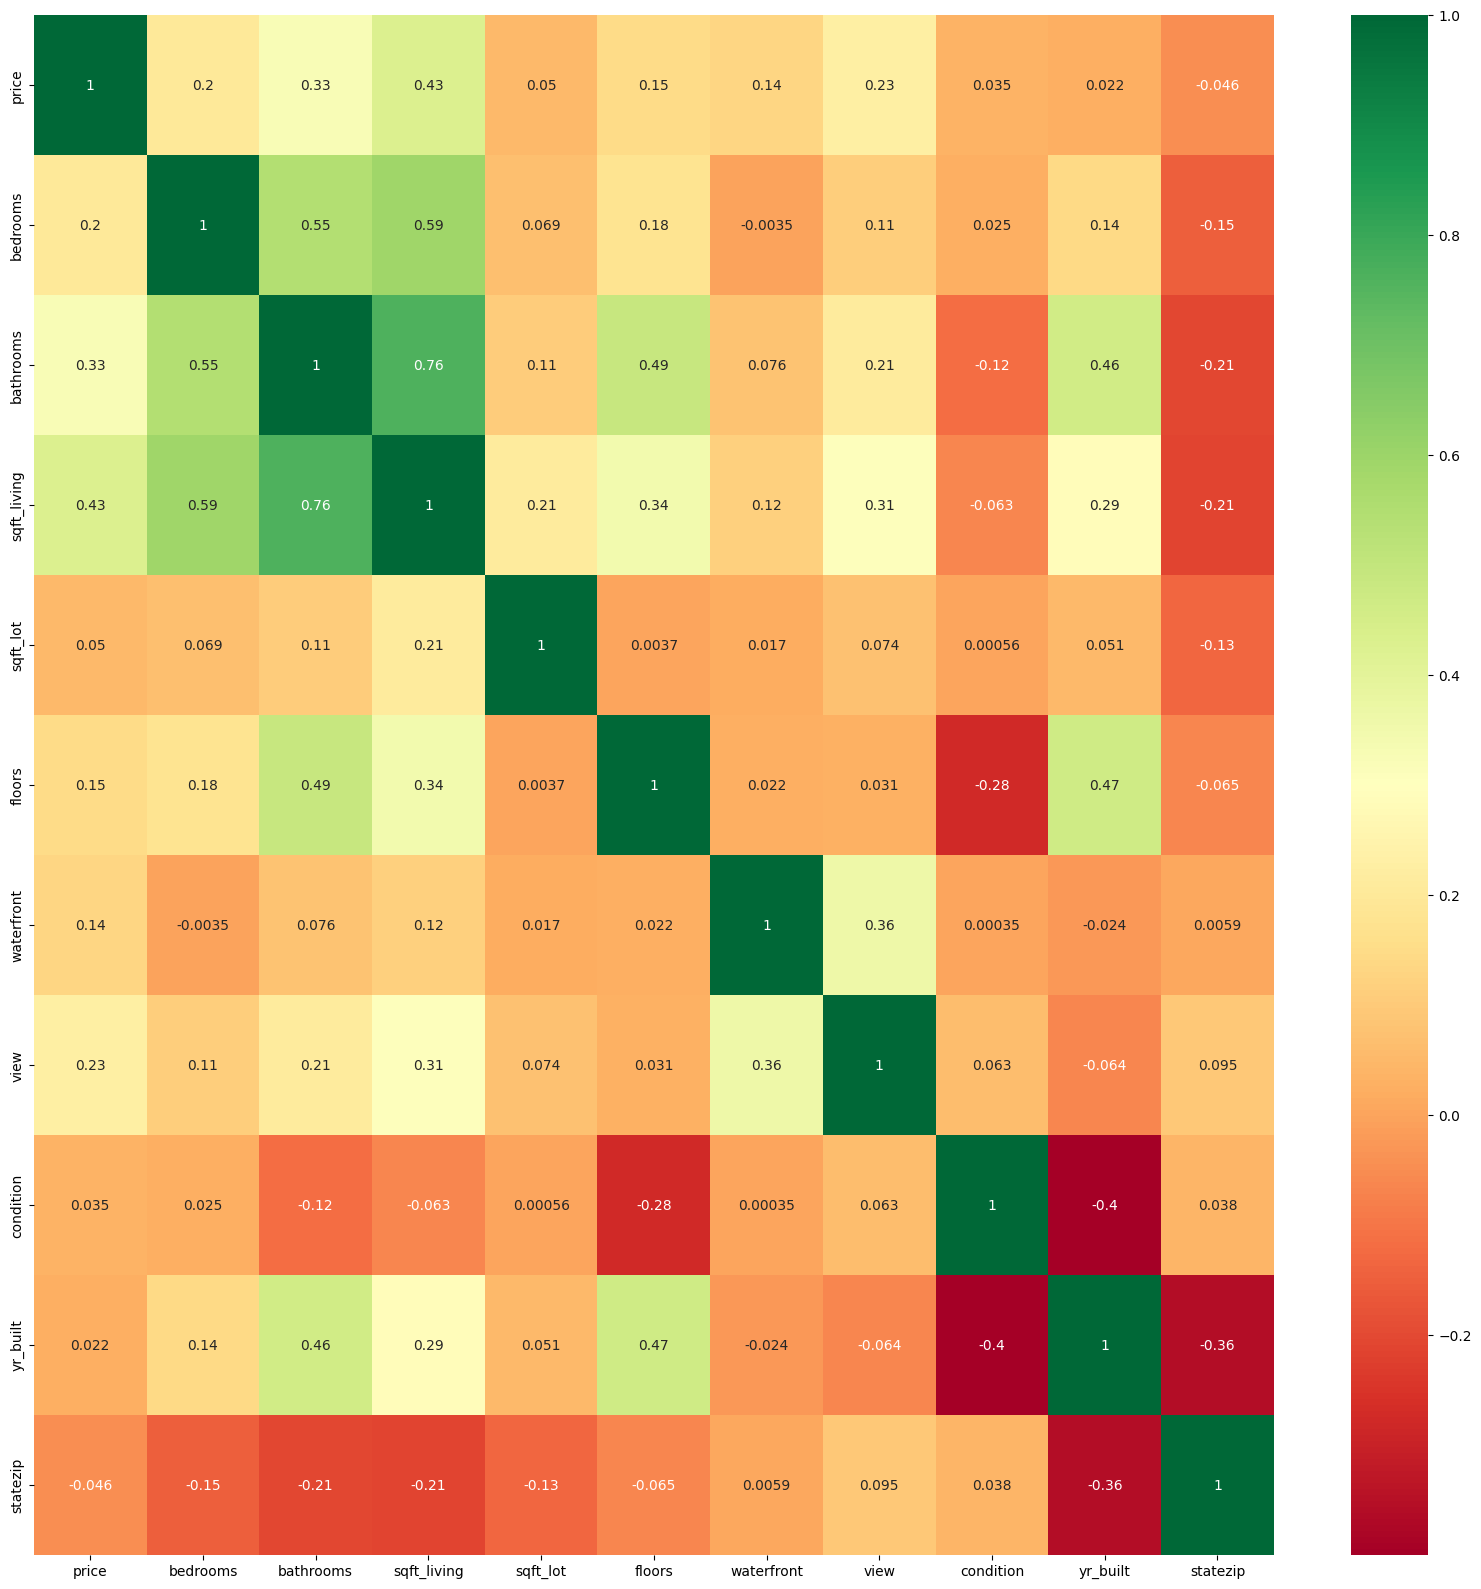

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [23]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,no_year
0,3,1.50,1340,7912,1.5,0,0,3,98133,67
1,5,2.50,3650,9050,2.0,0,4,5,98119,101
2,3,2.00,1930,11947,1.0,0,0,4,98042,56
3,3,2.25,2000,8030,1.0,0,0,4,98008,59
4,4,2.50,1940,10500,1.0,0,0,4,98052,46


In [24]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.03770014 0.07853038 0.30908424 0.1625796  0.02383734 0.01174436
 0.03698077 0.04996659 0.10184995 0.18772663]


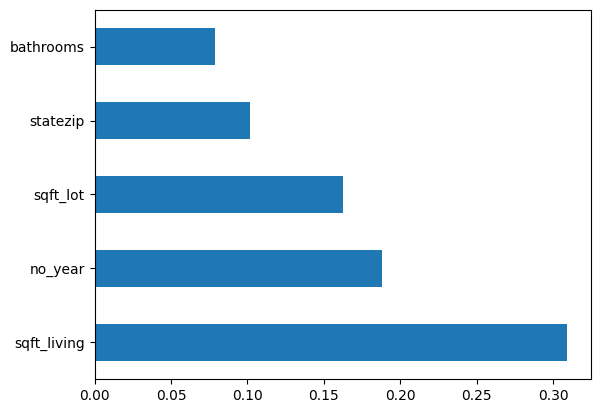

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape

(3680, 10)

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 8)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [33]:
# Create the random grid of hyperparameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 24, 30, 37, 43, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Create a RandomForestRegressor object
rf = RandomForestRegressor()

In [37]:
#created a RandomizedSearchCV object where we will pass rf object, random grid and number of iterations to run
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
#Fit the model on the training data
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.6s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.0s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.2s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.0s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.1s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.9s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.0s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.3s
[CV] END max_depth=43, m

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=43, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=43, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=43, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   6.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=43, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=43, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   6.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1300; total time=   4.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1300; total time=   4.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1300; total time=   5.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1300; total time=   5.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1300; total time=   5.2s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1300; total time=   3.3s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1300; total time=   3.5s
[CV] END max_depth=2

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=  13.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=  13.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=  13.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1500; total time=  13.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   2.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   2.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.5s
[CV] END max_depth=5, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 24, 30, 37, 43,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
predictions=rf_random.predict(X_test)

In [40]:
predictions

array([ 499590.20083602,  629308.18891658,  391536.64113891,
        322802.42338389,  846557.29772291, 1202072.66362446,
        727463.19916006,  476716.76109375,  833724.50746076,
        294184.78074382,  373196.85151139,  468986.49290205,
        547261.25717451,  399262.0798646 ,  241510.37253123,
       1046097.43397153,  651371.12281796,  401110.04041576,
        785477.03248882,  670861.68661403,  306116.41301207,
        327331.18179899,  542604.99723997,  200692.36867105,
        481384.35689735,  409191.10998464,  455835.20706296,
        604932.62869698,  669585.12826487,  592818.51454431,
        513132.14731295,  732731.74590192,  452710.09558018,
        381171.49771296,  322601.8681006 ,  525626.45438266,
        522709.05322741,  378428.0294065 , 1295654.21409265,
        575838.51088499,  683158.17851095,  347483.1492118 ,
        822287.50201702,  522892.66681151,  861644.96072946,
        521581.14093855,  299964.2945843 ,  599547.98186639,
        838772.75558879,

/var/folders/w2/4c4rdgtd6j53wf8z_tlycxh00000gn/T/ipykernel_9769/2542596898.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot: xlabel='price', ylabel='Density'>

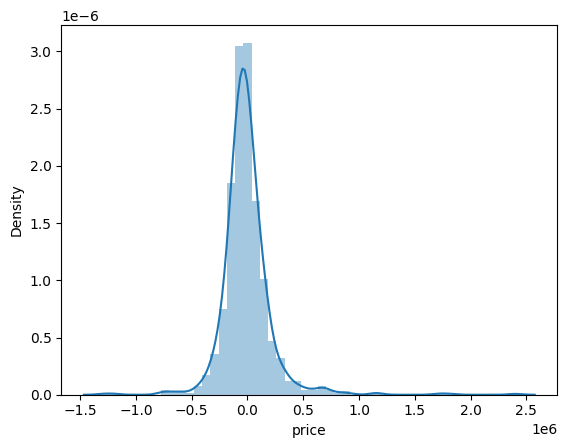

In [41]:
import seaborn as sns
sns.distplot(y_test-predictions)

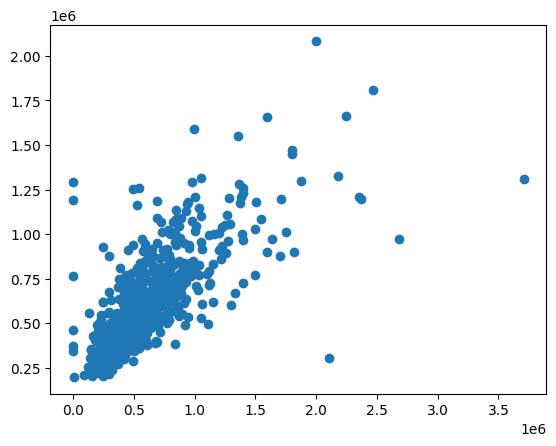

In [42]:
plt.scatter(y_test,predictions)

In [43]:
rf_random.best_score_

-297559477890.09814

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 137641.615128791
MSE: 52274262197.94559
RMSE: 228635.6538205395


In [45]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_y_5.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)